# Load the Data

In [3]:
# Imports

import importlib
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from scipy import stats, fft
import scipy.signal as signal
import statsmodels.api as sm
import seaborn as sns
import math
import numpy as np
import matplotlib as mpl
import os
from matplotlib.ticker import FormatStrFormatter
#from pyts.decomposition import SingularSpectrumAnalys isl
import nktools as nk
import nkplot as nkp
import inspect
import re
from dotmap import DotMap
from scipy.optimize import curve_fit


importlib.reload(nk)
importlib.reload(nkp)

#plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.style'] = 'normal'

# some info for charting
# Some universal graphic constants
std_mult = 3
neg_std_mult = 3
cm = 1/2.54


tc = lambda x: np.divide(x, 60)

In [4]:
# Improt the Data

fig4data_path = '../../data/raw_data/26072023_3step_allgRNAs_moreconcs.csv'


grna1_f4_wells = {
    'neg' : {'K9', 'K10', 'K11', 'K12', 'K13'}, # negtive
    'fm_10' : {'J9', 'J10', 'J11', 'J12', 'J13'},
    'fm_30' : {'I9', 'I10', 'I11', 'I12', 'I13'},
    'fm_90' : {'H9', 'H10', 'H11', 'H12', 'H13'},
    'fm_274' : {'G9', 'G10', 'G11', 'G12', 'G13'}, # '274fm HPV16 Target DNA'
    'fm_823' : {'F9', 'F10', 'F11', 'F12', 'F13'}, # '823fm HPV16 Target DNA'
    'pm_2' : {'E9', 'E10', 'E11', 'E12', 'E13'}, # '2.47pM HPV16 Target DNA'
    'pm_7' : {'D9', 'D10', 'D11', 'D12', 'D13'}, # '7.41pM HPV16 Target DNA'
    'pm_22' : {'C9', 'C10', 'C11', 'C12', 'C13'}, # '22.2pM HPV16 Target DNA'
    'pm_66' : {'B9', 'B10', 'B11', 'B12', 'B13'}, # '66.7pM HPV16 Target DNA'
    'pm_200' : {'A9', 'A10', 'A11', 'A12', 'A13'}, # '200pM HPV16 Target DNA'
}

grna2v2_f4_wells = {
    'neg' : {'K14', 'K15', 'K16', 'K17', 'K18'}, # negtive
    'fm_10' : {'J14', 'J15', 'J16', 'J17', 'J18'},
    'fm_30' : {'I14', 'I15', 'I16', 'I17', 'I18'},
    'fm_90' : {'H14', 'H15', 'H16', 'H17', 'H18'},
    'fm_274' : {'G14', 'G15', 'G16', 'G17', 'G18'}, # '274fm HPV16 Target DNA'
    'fm_823' : {'F14', 'F15', 'F16', 'F17', 'F18'}, # '823fm HPV16 Target DNA'
    'pm_2' : {'E14', 'E15', 'E16', 'E17', 'E18'}, # '2.47pM HPV16 Target DNA'
    'pm_7' : {'D14', 'D15', 'D16', 'D17', 'D18'}, # '7.41pM HPV16 Target DNA'
    'pm_22' : {'C14', 'C15', 'C16', 'C17', 'C18'}, # '22.2pM HPV16 Target DNA'
    'pm_66' : {'B14', 'B15', 'B16', 'B17', 'B18'}, # '66.7pM HPV16 Target DNA'
    'pm_200' : {'A14', 'A15', 'A16', 'A17', 'A18'}, # '200pM HPV16 Target DNA'
}

bothgrna_f4_wells = {
    'neg' : {'K19', 'K20', 'K21', 'K22', 'K23'}, # negtive
    'fm_10' : {'J19', 'J20', 'J21', 'J22', 'J23'},
    'fm_30' : {'I19', 'I20', 'I21', 'I22', 'I23'},
    'fm_90' : {'H19', 'H20', 'H21', 'H22', 'H23'},
    'fm_274' : {'G19', 'G20', 'G21', 'G22', 'G23'}, # '274fm HPV16 Target DNA
    'fm_823' : {'F19', 'F20', 'F21', 'F22', 'F23'}, # '823fm HPV16 Target DNA'
    'pm_2' : {'E19', 'E20', 'E21', 'E22', 'E23'}, # '2.47pM HPV16 Target DNA'
    'pm_7' : {'D19', 'D20', 'D21', 'D22', 'D23'}, # '7.41pM HPV16 Target DNA'
    'pm_22' : {'C19', 'C20', 'C21', 'C22', 'C23'}, # '22.2pM HPV16 Target DNA'
    'pm_66' : {'B19', 'B20', 'B21', 'B22', 'B23'}, # '66.7pM HPV16 Target DNA'
    'pm_200' : {'A19', 'A20', 'A21', 'A22', 'A23'}, # '200pM HPV16 Target DNA'
}


grna1 = nk.read_and_process_general_conc_quotient_data(fig4data_path, grna1_f4_wells, fam_range=(62, 348), tamra_range=(387,673))
grna2 = nk.read_and_process_general_conc_quotient_data(fig4data_path, grna2v2_f4_wells, fam_range=(62, 348), tamra_range=(387,673))
bothgrna = nk.read_and_process_general_conc_quotient_data(fig4data_path, bothgrna_f4_wells, fam_range=(62, 348), tamra_range=(387,673))

# Figure 4A: Both crRNA at All Concentrations

[[166.31372549 205.53333333 227.90980392 255.        ]
 [141.4        192.88627451 221.41960784 255.        ]
 [115.8        178.83137255 215.89803922 255.        ]
 [ 92.20784314 163.89803922 208.22745098 255.        ]
 [ 70.34117647 148.96470588 199.69411765 255.        ]
 [ 52.92941176 132.92941176 191.26666667 255.        ]
 [ 35.32941176 115.32941176 182.2        255.        ]
 [ 21.43137255  98.19215686 169.43137255 255.        ]
 [  8.88235294  82.12941176 156.88235294 255.        ]
 [  8.          64.56470588 131.59607843 255.        ]
 [  8.          48.         107.         255.        ]]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


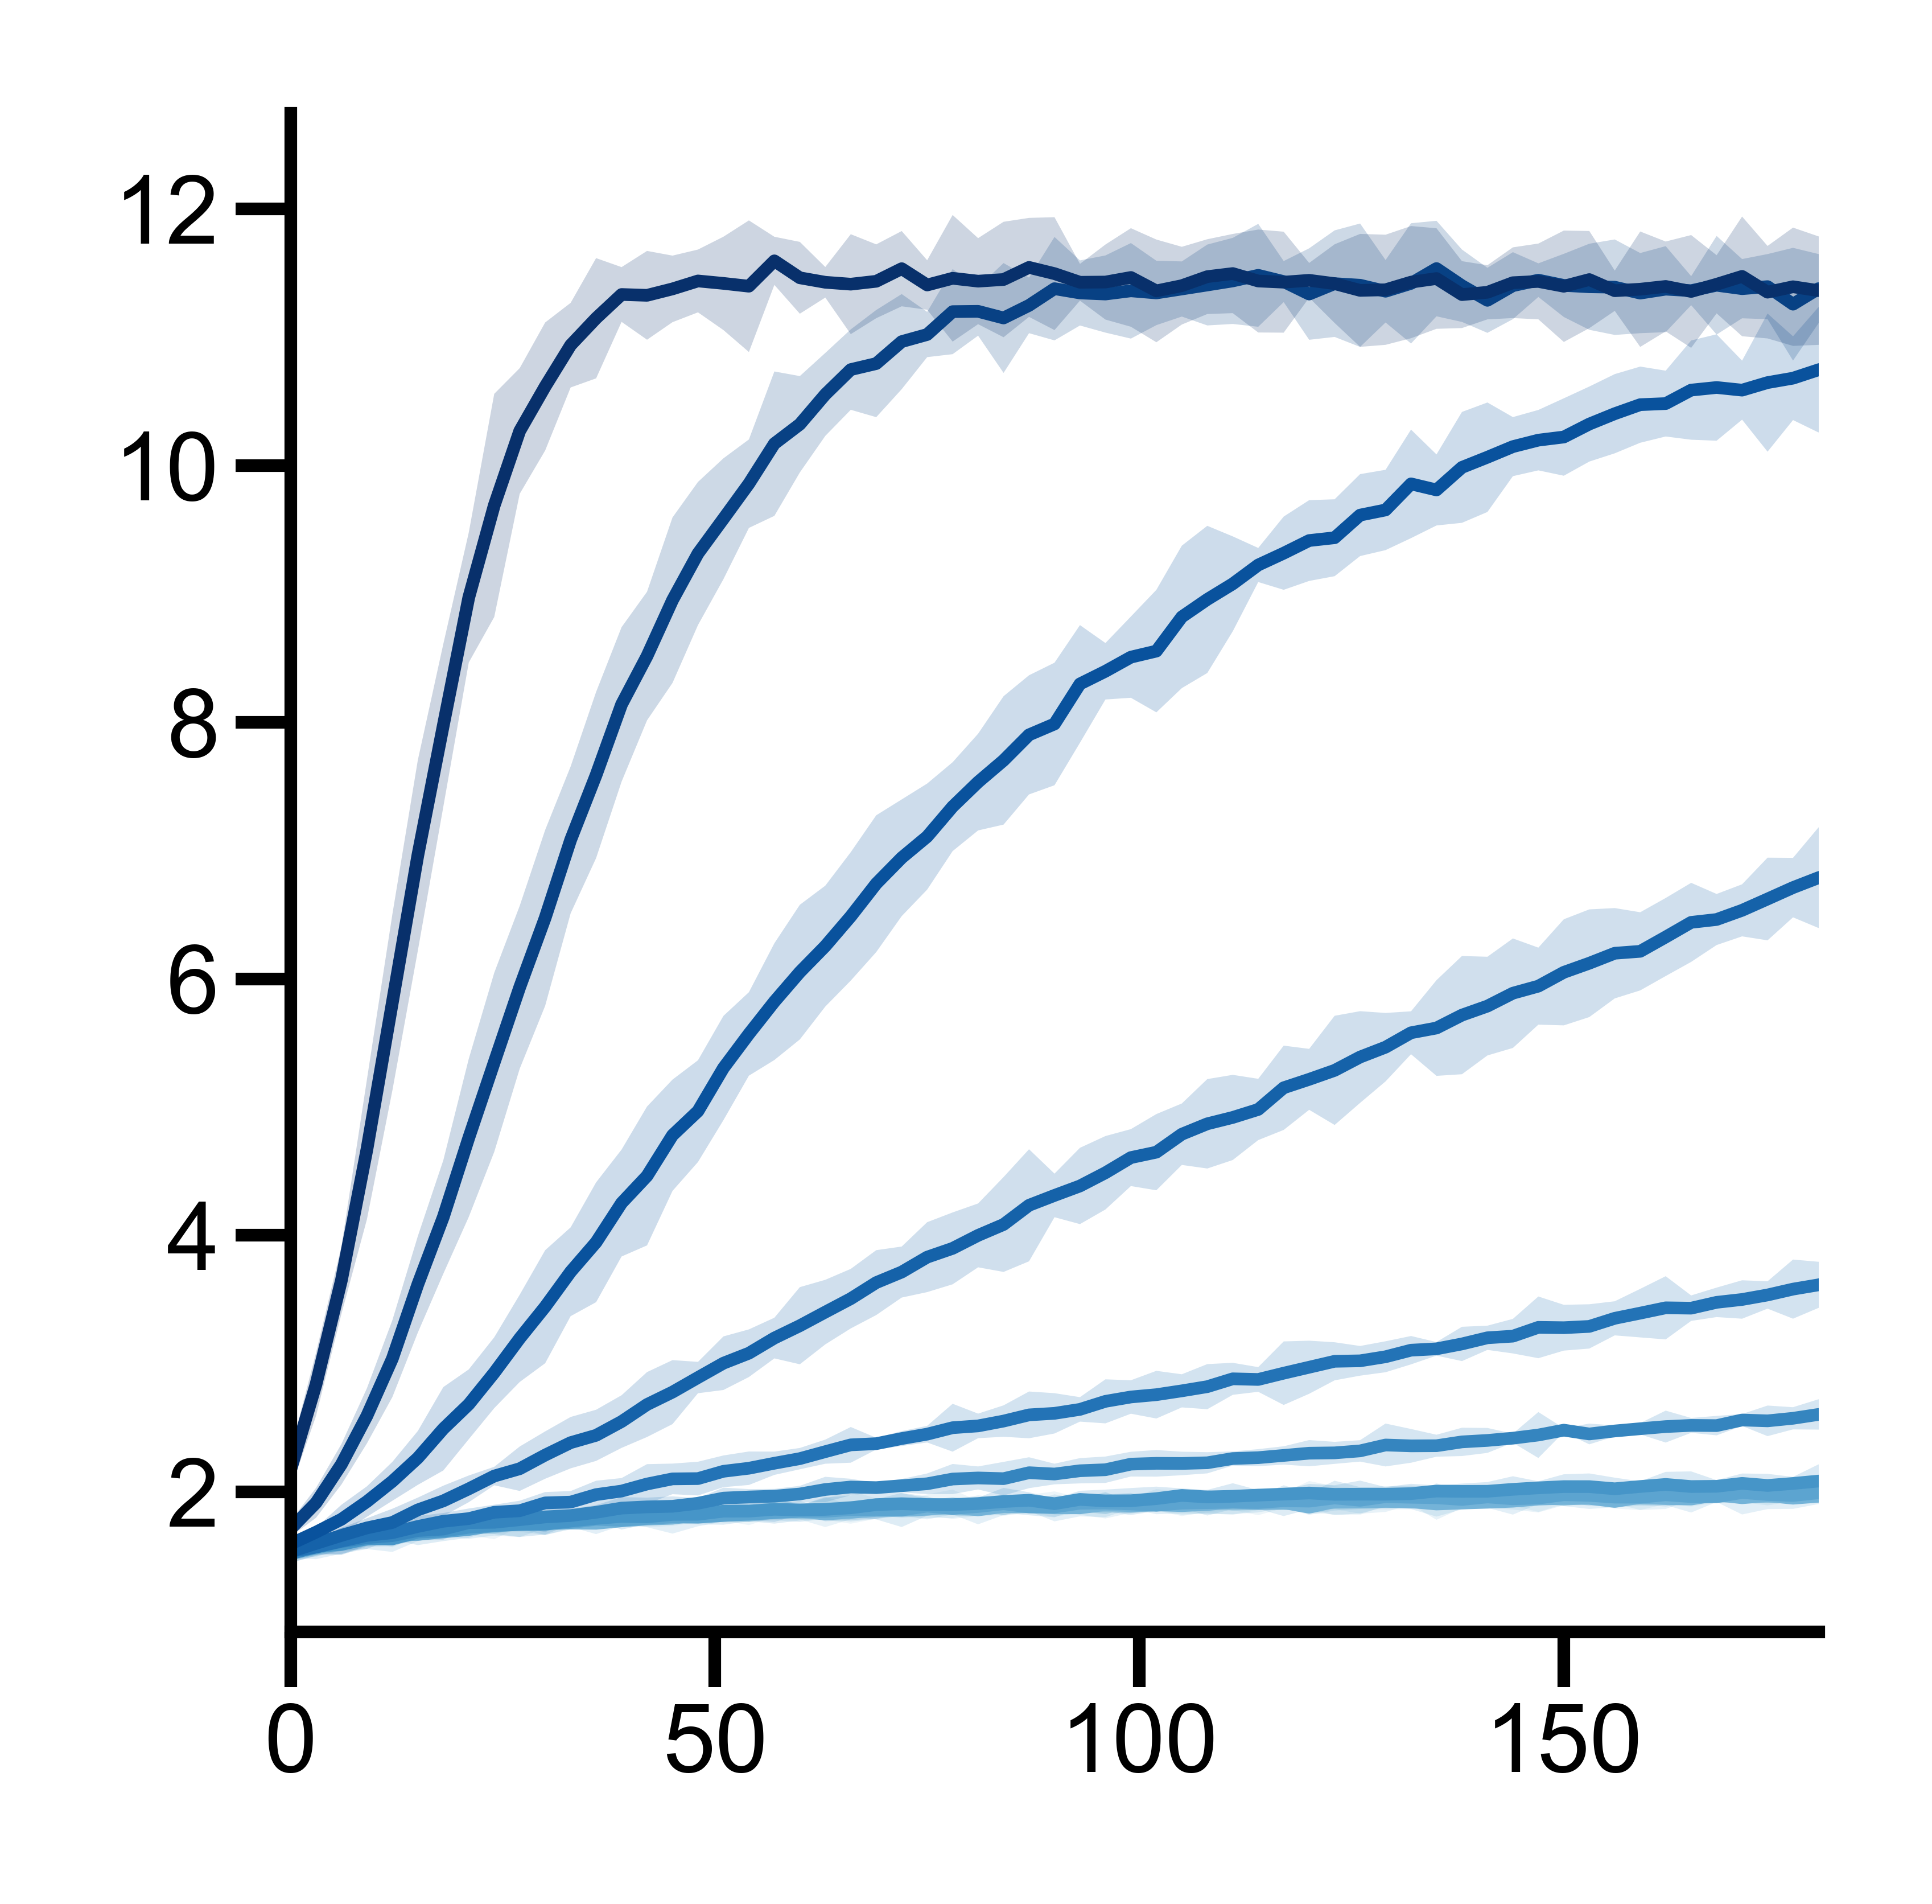

In [5]:
# plot
importlib.reload(nkp)

x1 = grna1.neg.quot.index

lns1 = [[x1, grna1.neg.quot_stats['mean']], [x1, grna1.fm_10.quot_stats['mean']], [x1, grna1.fm_30.quot_stats['mean']], [x1, grna1.fm_90.quot_stats['mean']], [x1, grna1.fm_274.quot_stats['mean']], [x1, grna1.fm_823.quot_stats['mean']], [x1, grna1.pm_2.quot_stats['mean']], 
[x1, grna1.pm_7.quot_stats['mean']], [x1, grna1.pm_22.quot_stats['mean']], [x1, grna1.pm_66.quot_stats['mean']], [x1, grna1.pm_200.quot_stats['mean']]]

errs1 = [grna1.neg.quot_stats['stdev'], grna1.fm_10.quot_stats['stdev'], grna1.fm_30.quot_stats['stdev'], grna1.fm_90.quot_stats['stdev'],
 grna1.fm_274.quot_stats['stdev'], grna1.fm_823.quot_stats['stdev'], grna1.pm_2.quot_stats['stdev'], grna1.pm_7.quot_stats['stdev'],
 grna1.pm_22.quot_stats['stdev'], grna1.pm_66.quot_stats['stdev'], grna1.pm_200.quot_stats['stdev']]

labels1 = ['Negative', '10 fM', '30 fM', '90 fM', '274 fm', '823 fm', '2.47 pM', '7.41 pM', '22.2 pM', '66.7 pM', '200 pM']

ax1 = nkp.AxisPackage(lns1, labels1, errs1, ['Time (s)', 'FAM/TAMRA Quotient'])



x2 = tc(grna2.neg.quot.index)
lns2 = [[x2, grna2.neg.quot_stats['mean']], [x2, grna2.fm_10.quot_stats['mean']], [x2, grna2.fm_30.quot_stats['mean']], [x2, grna2.fm_90.quot_stats['mean']], [x2, grna2.fm_274.quot_stats['mean']], [x2, grna2.fm_823.quot_stats['mean']], [x2, grna2.pm_2.quot_stats['mean']],
[x2, grna2.pm_7.quot_stats['mean']], [x2, grna2.pm_22.quot_stats['mean']], [x2, grna2.pm_66.quot_stats['mean']], [x2, grna2.pm_200.quot_stats['mean']]]
errs2 = [grna2.neg.quot_stats['stdev'], grna2.fm_10.quot_stats['stdev'], grna2.fm_30.quot_stats['stdev'], grna2.fm_90.quot_stats['stdev'],
    grna2.fm_274.quot_stats['stdev'], grna2.fm_823.quot_stats['stdev'], grna2.pm_2.quot_stats['stdev'], grna2.pm_7.quot_stats['stdev'],
    grna2.pm_22.quot_stats['stdev'], grna2.pm_66.quot_stats['stdev'], grna2.pm_200.quot_stats['stdev']]
labels2 = ['_Negative', '_10 fM', '_30 fM', '_90 fM', '_274 fm', '_823 fm', '_2.47 pM', '_7.41 pM', '_22.2 pM', '_66.7 pM', '_200 pM']

ax2 = nkp.AxisPackage(lns2, labels2, errs2, ['Time (s)', 'FAM/TAMRA Quotient'])

xboth = tc(bothgrna.neg.quot.index)
lnsboth = [[xboth, bothgrna.neg.quot_stats['mean']], [xboth, bothgrna.fm_10.quot_stats['mean']], [xboth, bothgrna.fm_30.quot_stats['mean']], [xboth, bothgrna.fm_90.quot_stats['mean']], [xboth, bothgrna.fm_274.quot_stats['mean']], [xboth, bothgrna.fm_823.quot_stats['mean']], [xboth, bothgrna.pm_2.quot_stats['mean']],
[xboth, bothgrna.pm_7.quot_stats['mean']], [xboth, bothgrna.pm_22.quot_stats['mean']], [xboth, bothgrna.pm_66.quot_stats['mean']], [xboth, bothgrna.pm_200.quot_stats['mean']]]
errsboth = [bothgrna.neg.quot_stats['stdev'], bothgrna.fm_10.quot_stats['stdev'], bothgrna.fm_30.quot_stats['stdev'], bothgrna.fm_90.quot_stats['stdev'],
    bothgrna.fm_274.quot_stats['stdev'], bothgrna.fm_823.quot_stats['stdev'], bothgrna.pm_2.quot_stats['stdev'], bothgrna.pm_7.quot_stats['stdev'],
    bothgrna.pm_22.quot_stats['stdev'], bothgrna.pm_66.quot_stats['stdev'], bothgrna.pm_200.quot_stats['stdev']]
labelsboth = ['_Negative', '_10 fM', '_30 fM', '_90 fM', '_274 fm', '_823 fm', '_2.47 pM', '_7.41 pM', '_22.2 pM', '_66.7 pM', '_200 pM']

axboth = nkp.AxisPackage(lnsboth, labels1, errsboth, ['Time (s)', 'FAM/TAMRA Quotient'])


apa = [[axboth]]
fig, ax = nkp.general_lineplot_errorfill(apa, stdmult=std_mult, neg_std_mult=std_mult, figsize=(4.4*cm, 4.4*cm), dpi=2000, publish_ready=True, color_output=True)
#fig.suptitle('All COmbinations of gRNA, Extended Conc', fontsize=12, y=1.0)
fig.subplots_adjust(wspace=.6)

ax[0][0].set_xlim(0, 180)

plt.savefig('./charts/fig4a_bothgrna_LOWallconc.svg', dpi=2000)
plt.savefig('./charts/fig4a_bothgrna_LOWallconc.png', dpi=2000)
plt.savefig('./charts/fig4a_bothgrna_LOWallconc.eps', dpi=2000)

# 4B: Stacking

[[  0.    0.   76.5 255. ]
 [  0.    0.  219.3 255. ]
 [153.  153.  255.  255. ]
 [255.  153.  153.  255. ]
 [229.5   0.    0.  255. ]
 [127.5   0.    0.  255. ]]
[[ 59.411712  15.331584 112.04992  256.      ]
 [183.395072  55.035392 121.67424  256.      ]
 [254.652928 159.8336   109.413632 256.      ]]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


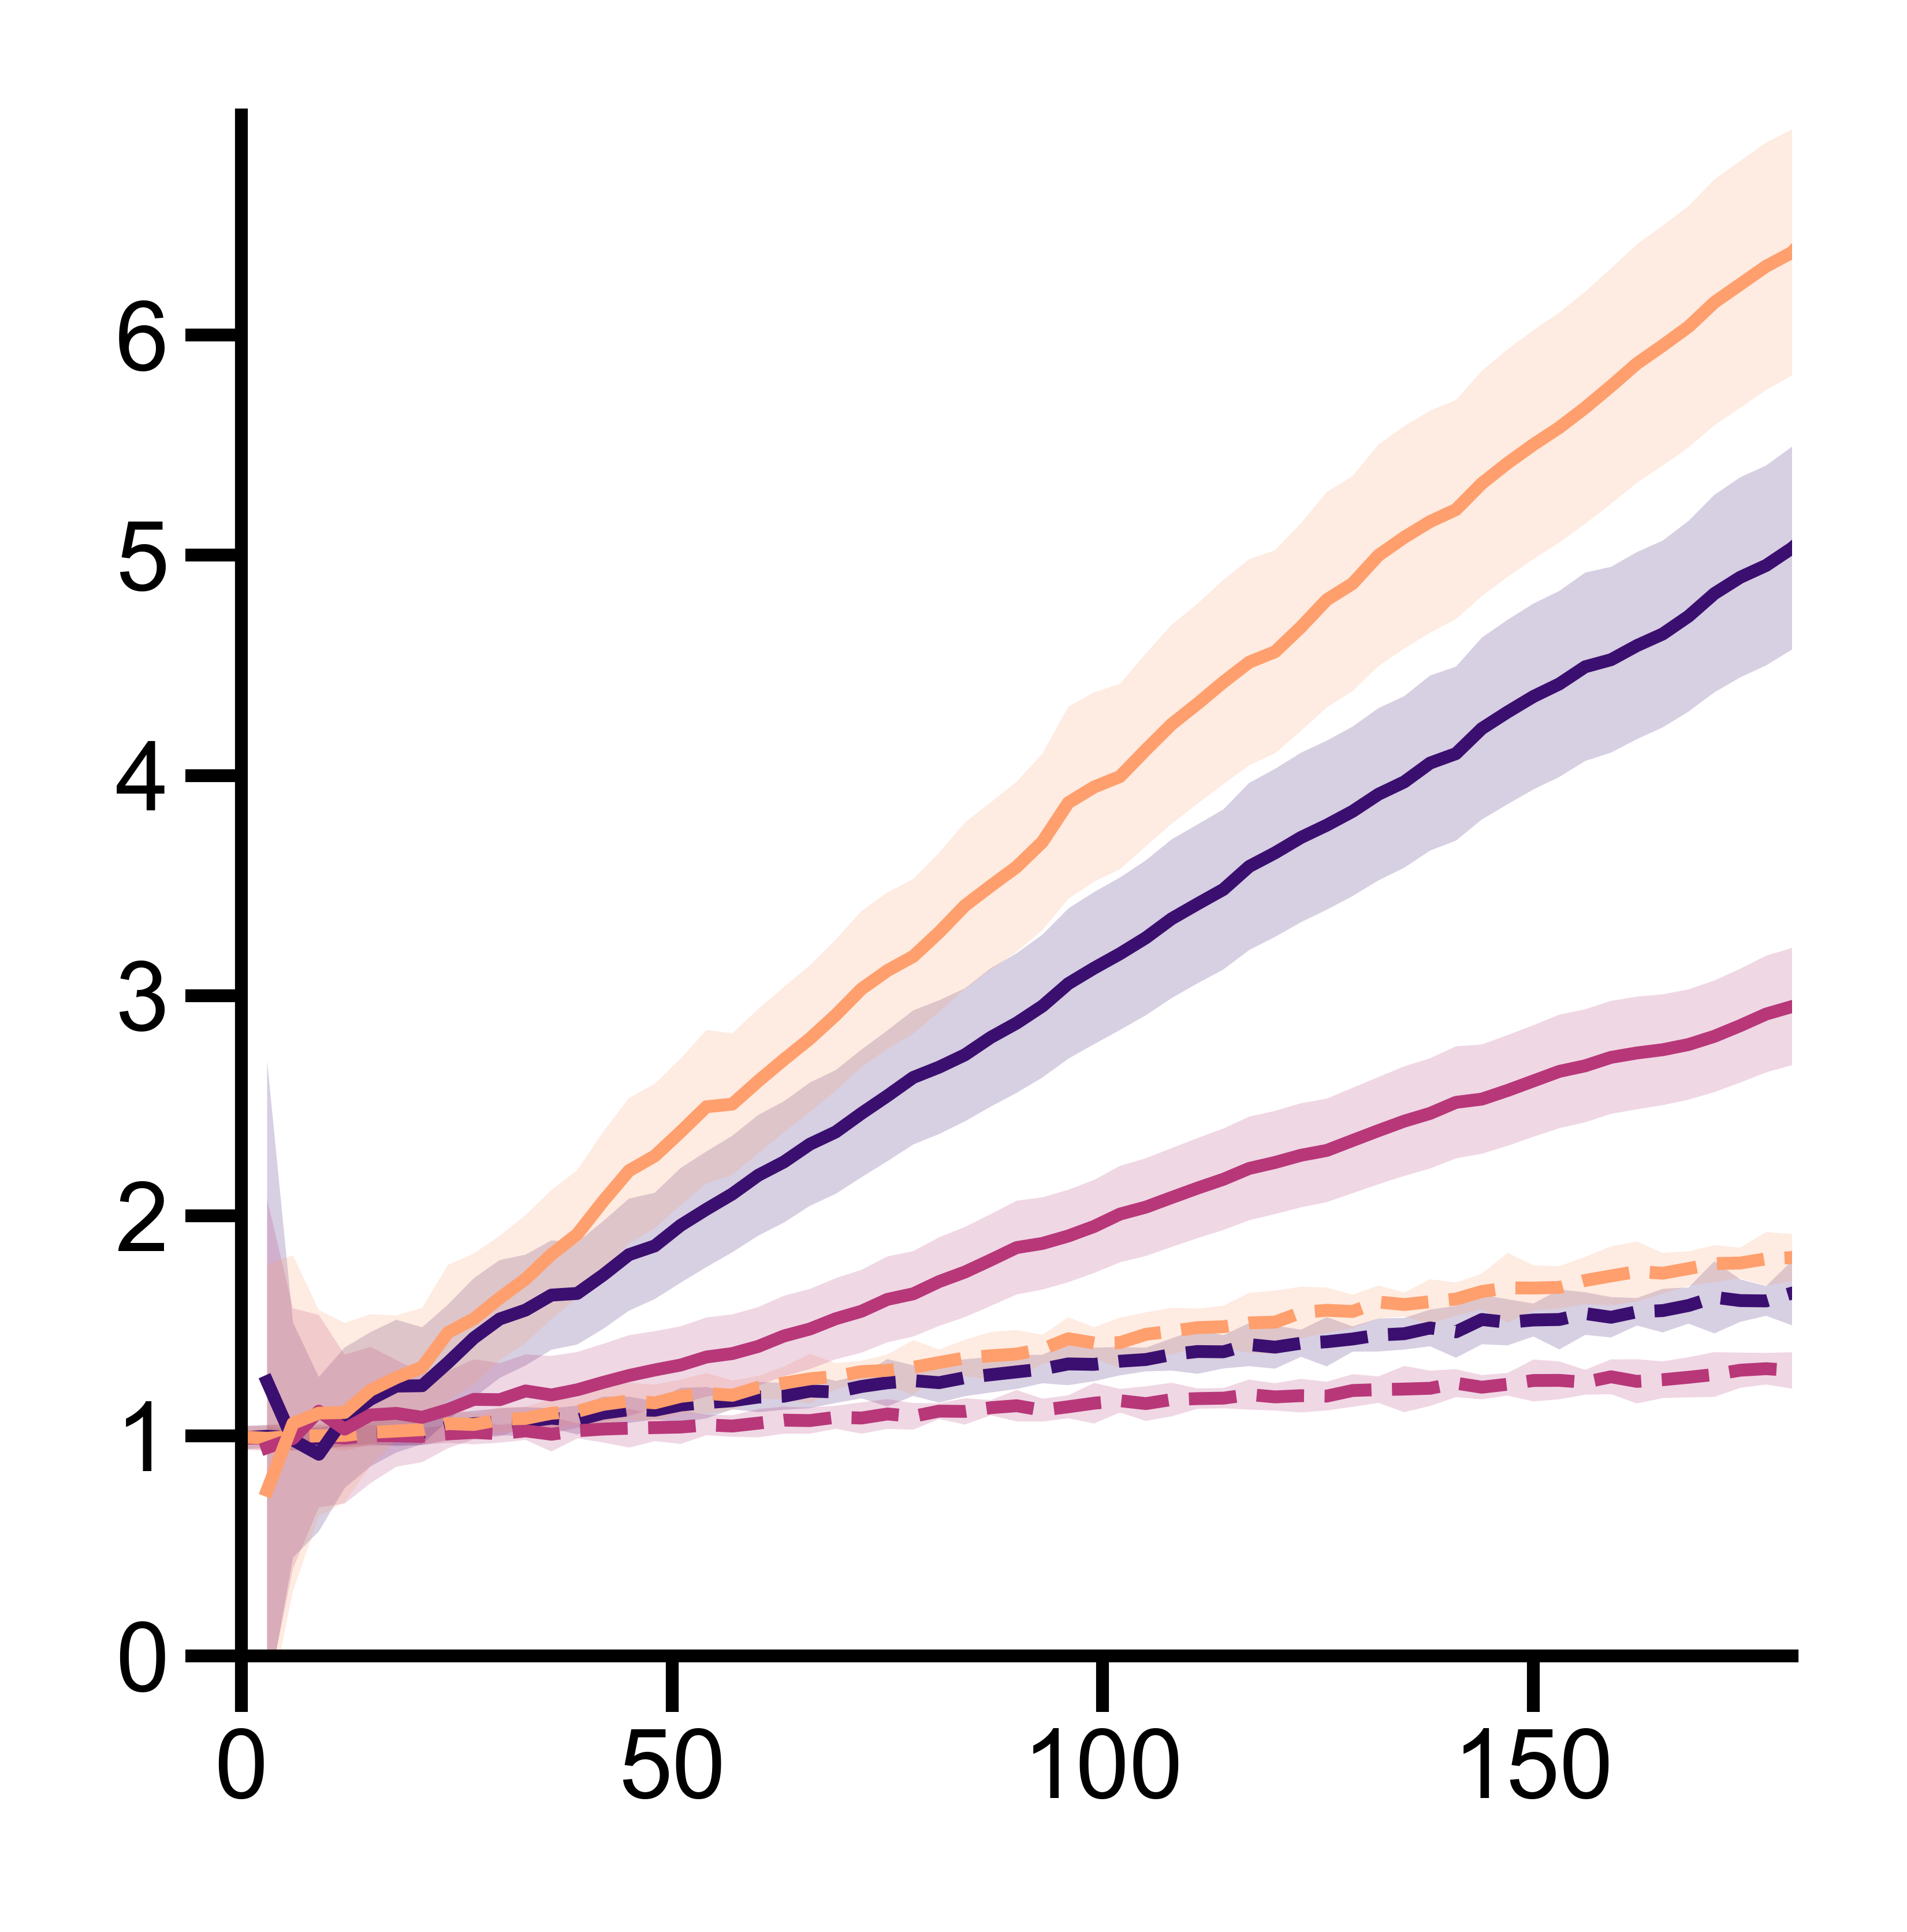

In [6]:
importlib.reload(nkp)

# both grna slope
bothgrna_f4_2pM_quotient = bothgrna.pm_2.quot
bothgrna_f4_neg_quotient = bothgrna.neg.quot

bg_2slope = nk.get_slope_data(bothgrna_f4_2pM_quotient).rename(columns={'slope':'mean', 'std_err':'stdev'})
bg_negslope = nk.get_slope_data(bothgrna_f4_neg_quotient).rename(columns={'slope':'mean', 'std_err':'stdev'})
gboth_slope = nk.simple_div_err_prop(bg_2slope, bg_negslope)

# g1 slope
g1_2pm_quotient = grna1.pm_2.quot
g1_neg_quotient = grna1.neg.quot

g1slope_2pm = nk.get_slope_data(g1_2pm_quotient).rename(columns={'slope':'mean', 'std_err':'stdev'})
g1slope_neg = nk.get_slope_data(g1_neg_quotient).rename(columns={'slope':'mean', 'std_err':'stdev'})
g1slope = nk.simple_div_err_prop(g1slope_2pm, g1slope_neg)


# g2 slope
g2_2pm_quotient = grna2.pm_2.quot
g2_neg_quotient = grna2.neg.quot

g2slope_2pm = nk.get_slope_data(g2_2pm_quotient).rename(columns={'slope':'mean', 'std_err':'stdev'})
g2slope_neg = nk.get_slope_data(g2_neg_quotient).rename(columns={'slope':'mean', 'std_err':'stdev'})
g2slope = nk.simple_div_err_prop(g2slope_2pm, g2slope_neg)

# g 1 and 2 alone

g1 = nk.simple_div_err_prop(grna1.pm_2.quot_stats, grna1.neg.quot_stats)
g2 = nk.simple_div_err_prop(grna2.pm_2.quot_stats, grna2.neg.quot_stats)
gboth = nk.simple_div_err_prop(bothgrna.pm_2.quot_stats, bothgrna.neg.quot_stats)


lstack = [[tc(g1.index), g1['mean']], [tc(g2.index), g2['mean']], [tc(gboth.index), gboth['mean']], [tc(g1slope.index), g1slope['mean']], [tc(g2slope.index), g2slope['mean']], [tc(gboth_slope.index), gboth_slope['mean']]]
estack = [g1['stdev'], g2['stdev'], gboth['stdev'], g1slope['stdev'], g2slope['stdev'], gboth_slope['stdev']]
lbstack = ['gRNA 1 Quotient', 'gRNA 2 Quotient', 'gRNA 1+2 Quotient', 'gRNA 1 Slope', 'gRNA 2 Slope', 'gRNS 1+2 Slope']

axstack = nkp.AxisPackage(lstack, lbstack, estack, ['Time (s)', 'Folds of Negative'])


apa = [[axstack]]
cmap = plt.get_cmap('seismic')
fig, ax = nkp.general_lineplot_errorfill(apa, stdmult=std_mult, neg_std_mult=std_mult, figsize=(4.4*cm, 4.4*cm), dpi=2000, publish_ready=True, color_output=True, colormap=cmap)
#fig.suptitle('All COmbinations of gRNA, Extended Conc', fontsize=12, y=1.0)
fig.subplots_adjust(wspace=.3)
ax[0][0].set_xlim(0, 180)
ax[0][0].set_ylim(0, 7)



# fix the colors to be how i want fo rthis specific graph

a = ax[0][0]
ocolormap = mpl.colormaps['magma']
colors = ocolormap(np.linspace(0.2,.8, 1024))
colormap = mpl.colors.ListedColormap(colors)
colors = colormap(np.linspace(0, 1, 3))

a.get_lines()[0].set_color(colors[0])
a.get_lines()[1].set_color(colors[1])
a.get_lines()[2].set_color(colors[2])

a.get_lines()[3].set_color(colors[0])
a.get_lines()[4].set_color(colors[1])
a.get_lines()[5].set_color(colors[2])

a.get_lines()[0].set_linestyle('dashed')
a.get_lines()[1].set_linestyle('dashed')
a.get_lines()[2].set_linestyle('dashed')

a.collections[0].set_color(colors[0])
a.collections[1].set_color(colors[1])
a.collections[2].set_color(colors[2])

a.collections[3].set_color(colors[0])
a.collections[4].set_color(colors[1])
a.collections[5].set_color(colors[2])

a.set_ylim(0, 7)
a.set_yticks([0, 1,2,3,4,5,6])


print(np.multiply(colors, 256))


plt.savefig('./charts/fig4b_LOWstacking.svg', dpi=2000)
plt.savefig('./charts/fig4b_LOWstacking.png', dpi=2000)
plt.savefig('./charts/fig4b_LOWstacking.eps', dpi=2000)

# 4C: TTS

In [8]:
bgrna_q_200pm_slopes = nk.get_slope_data(bothgrna.pm_200.quot)
bgrna_q_67pm_slopes = nk.get_slope_data(bothgrna.pm_66.quot)
bgrna_q_22pm_slopes = nk.get_slope_data(bothgrna.pm_22.quot)
bgrna_q_7pm_slopes = nk.get_slope_data(bothgrna.pm_7.quot)
bgrna_q_2pm_slopes = nk.get_slope_data(bothgrna.pm_2.quot)
bgrna_q_823fm_slopes = nk.get_slope_data(bothgrna.fm_823.quot)
bgrna_q_274fm_slopes = nk.get_slope_data(bothgrna.fm_274.quot)
bgrna_q_90fm_slopes = nk.get_slope_data(bothgrna.fm_90.quot)
bgrna_q_30fm_slopes = nk.get_slope_data(bothgrna.fm_30.quot)
bgrna_q_10fm_slopes = nk.get_slope_data(bothgrna.fm_10.quot)
bgrna_q_neg_slopes = nk.get_slope_data(bothgrna.neg.quot)

default_slope_fail = float('nan')
nstdev = 3
req_len_sep = 4
bgrna_qs_neg_stats = nk.slope_time_to_significance(bgrna_q_neg_slopes, bgrna_q_neg_slopes, nstdev=nstdev, req_len_sep=req_len_sep, nan_replace=default_slope_fail)
bgrna_qs_10fm_stats = nk.slope_time_to_significance(bgrna_q_10fm_slopes, bgrna_q_neg_slopes, nstdev=nstdev, req_len_sep=req_len_sep, nan_replace=default_slope_fail)
bgrna_qs_30fm_stats = nk.slope_time_to_significance(bgrna_q_30fm_slopes, bgrna_q_neg_slopes, nstdev=nstdev, req_len_sep=req_len_sep, nan_replace=default_slope_fail)
bgrna_qs_90fm_stats = nk.slope_time_to_significance(bgrna_q_90fm_slopes, bgrna_q_neg_slopes, nstdev=nstdev, req_len_sep=req_len_sep, nan_replace=default_slope_fail)
bgrna_qs_274fm_stats = nk.slope_time_to_significance(bgrna_q_274fm_slopes, bgrna_q_neg_slopes, nstdev=nstdev, req_len_sep=req_len_sep, nan_replace=default_slope_fail)
bgrna_qs_823fm_stats = nk.slope_time_to_significance(bgrna_q_823fm_slopes, bgrna_q_neg_slopes, nstdev=nstdev, req_len_sep=req_len_sep, nan_replace=default_slope_fail)
bgrna_qs_2pm_stats = nk.slope_time_to_significance(bgrna_q_2pm_slopes, bgrna_q_neg_slopes, nstdev=nstdev, req_len_sep=req_len_sep, nan_replace=default_slope_fail)
bgrna_qs_7pm_stats = nk.slope_time_to_significance(bgrna_q_7pm_slopes, bgrna_q_neg_slopes, nstdev=nstdev, req_len_sep=req_len_sep, nan_replace=default_slope_fail)
bgrna_qs_22pm_stats = nk.slope_time_to_significance(bgrna_q_22pm_slopes, bgrna_q_neg_slopes, nstdev=nstdev, req_len_sep=req_len_sep, nan_replace=default_slope_fail)
bgrna_qs_66pm_stats = nk.slope_time_to_significance(bgrna_q_67pm_slopes, bgrna_q_neg_slopes, nstdev=nstdev, req_len_sep=req_len_sep, nan_replace=default_slope_fail)
bgrna_qs_200pm_stats = nk.slope_time_to_significance(bgrna_q_200pm_slopes, bgrna_q_neg_slopes, nstdev=nstdev, req_len_sep=req_len_sep, nan_replace=default_slope_fail)

180      NaN
360      NaN
540      NaN
720      0.0
900      0.0
        ... 
50580    0.0
50760    0.0
50940    0.0
51120    0.0
51300    0.0
Length: 285, dtype: float64
180      NaN
360      NaN
540      NaN
720      0.0
900      0.0
        ... 
50580    1.0
50760    1.0
50940    1.0
51120    1.0
51300    1.0
Length: 285, dtype: float64
180      NaN
360      NaN
540      NaN
720      0.0
900      0.0
        ... 
50580    1.0
50760    1.0
50940    1.0
51120    1.0
51300    1.0
Length: 285, dtype: float64
180      NaN
360      NaN
540      NaN
720      0.0
900      0.0
        ... 
50580    1.0
50760    1.0
50940    1.0
51120    1.0
51300    1.0
Length: 285, dtype: float64
180      NaN
360      NaN
540      NaN
720      0.0
900      0.0
        ... 
50580    1.0
50760    1.0
50940    1.0
51120    1.0
51300    1.0
Length: 285, dtype: float64
180      NaN
360      NaN
540      NaN
720      0.0
900      0.0
        ... 
50580    1.0
50760    1.0
50940    1.0
51120    1.0
51300    1.0
Le

In [9]:

grna1_tts = nk.calc_tts_stat(grna1)
grna2_tts = nk.calc_tts_stat(grna2)
grnaboth_tts = nk.calc_tts_stat(bothgrna)

#concs =  [0, 0.01016, 0.03048, 0.09145, 0.27435, 0.8230, 2.469, 7.407, 22.22, 66.67, 200]
concs =  [0.03048, 0.09145, 0.27435, 0.8230, 2.469, 7.407, 22.22, 66.67, 200]


tts_dict = {
    'gRNA1 Ratiometric Readout': [
        concs,
        tc([grna1_tts.fm_30.quot.mean, grna1_tts.fm_90.quot.mean, grna1_tts.fm_274.quot.mean, 
            grna1_tts.fm_823.quot.mean, grna1_tts.pm_2.quot.mean, grna1_tts.pm_7.quot.mean, grna1_tts.pm_22.quot.mean, grna1_tts.pm_66.quot.mean, grna1_tts.pm_200.quot.mean]),
        tc([grna1_tts.fm_30.quot.std, grna1_tts.fm_90.quot.std, grna1_tts.fm_274.quot.std,
            grna1_tts.fm_823.quot.std, grna1_tts.pm_2.quot.std, grna1_tts.pm_7.quot.std, grna1_tts.pm_22.quot.std, grna1_tts.pm_66.quot.std, grna1_tts.pm_200.quot.std])
    ],
    'gRNA2 Ratiometric Readout': [
        concs,
        tc([grna2_tts.fm_30.quot.mean, grna2_tts.fm_90.quot.mean, grna2_tts.fm_274.quot.mean,
            grna2_tts.fm_823.quot.mean, grna2_tts.pm_2.quot.mean, grna2_tts.pm_7.quot.mean, grna2_tts.pm_22.quot.mean, grna2_tts.pm_66.quot.mean, grna2_tts.pm_200.quot.mean]),
        tc([grna2_tts.fm_30.quot.std, grna2_tts.fm_90.quot.std, grna2_tts.fm_274.quot.std,
            grna2_tts.fm_823.quot.std, grna2_tts.pm_2.quot.std, grna2_tts.pm_7.quot.std, grna2_tts.pm_22.quot.std, grna2_tts.pm_66.quot.std, grna2_tts.pm_200.quot.std])
    ],
    'gRNA1 + gRNA2 Ratiometric Readout': [
        concs,
        tc([grnaboth_tts.fm_30.quot.mean, grnaboth_tts.fm_90.quot.mean, grnaboth_tts.fm_274.quot.mean,
            grnaboth_tts.fm_823.quot.mean, grnaboth_tts.pm_2.quot.mean, grnaboth_tts.pm_7.quot.mean, grnaboth_tts.pm_22.quot.mean, grnaboth_tts.pm_66.quot.mean, grnaboth_tts.pm_200.quot.mean]),
        tc([grnaboth_tts.fm_30.quot.std, grnaboth_tts.fm_90.quot.std, grnaboth_tts.fm_274.quot.std,
            grnaboth_tts.fm_823.quot.std, grnaboth_tts.pm_2.quot.std, grnaboth_tts.pm_7.quot.std, grnaboth_tts.pm_22.quot.std, grnaboth_tts.pm_66.quot.std, grnaboth_tts.pm_200.quot.std])
    ],
    'gRNA1 + gRNA2 Slope Analysis': [
        concs,
        tc([bgrna_qs_30fm_stats['mean'], bgrna_qs_90fm_stats['mean'], bgrna_qs_274fm_stats['mean'], bgrna_qs_823fm_stats['mean'],
            bgrna_qs_2pm_stats['mean'], bgrna_qs_7pm_stats['mean'], bgrna_qs_22pm_stats['mean'], bgrna_qs_66pm_stats['mean'], bgrna_qs_200pm_stats['mean']]),
        tc([bgrna_qs_30fm_stats['std'], bgrna_qs_90fm_stats['std'], bgrna_qs_274fm_stats['std'], bgrna_qs_823fm_stats['std'],
                bgrna_qs_2pm_stats['std'], bgrna_qs_7pm_stats['std'], bgrna_qs_22pm_stats['std'], bgrna_qs_66pm_stats['std'], bgrna_qs_200pm_stats['std']])
    ],
}

[[166.31372549 205.53333333 227.90980392 255.        ]
 [ 84.49019608 158.62745098 205.21568627 255.        ]
 [ 26.1372549  104.21568627 174.1372549  255.        ]
 [  8.          48.         107.         255.        ]]
<a list of 12 Line2D objects>
[[ 59.411712  15.331584 112.04992  256.      ]
 [140.873472  41.256448 129.464064 256.      ]
 [222.411008  73.658368 104.781568 256.      ]
 [254.652928 159.8336   109.413632 256.      ]]


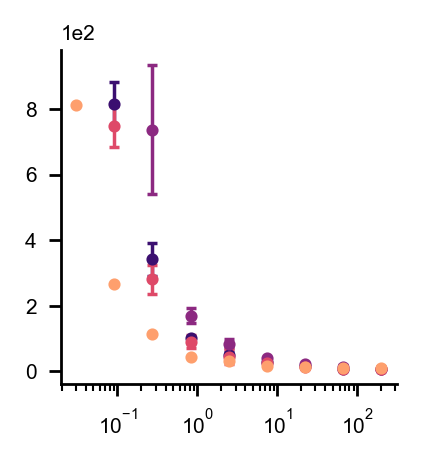

In [10]:
importlib.reload(nkp)
fig,ax = nkp.tts_plot(tts_dict, dpi=250, figsize=(4.4*cm,4.4*cm), include_fit=False, publish_ready=True, color_output=True)
#ax.set_yscale('log')
ax.set_xscale('log')



a = ax
ocolormap = mpl.colormaps['magma']
colors = ocolormap(np.linspace(0.2,.8, 1024))
colormap = mpl.colors.ListedColormap(colors)
colors = colormap(np.linspace(0, 1, 4))

#grna 1 items
a.get_lines()[0].set_color(colors[0])
a.get_lines()[1].set_color(colors[0])
a.get_lines()[2].set_color(colors[0])
a.collections[0].set_color(colors[0])

# grna 2 items
a.get_lines()[3].set_color(colors[1])
a.get_lines()[4].set_color(colors[1])
a.get_lines()[5].set_color(colors[1])
a.collections[1].set_color(colors[1])

# grna both items
a.get_lines()[6].set_color(colors[2])
a.get_lines()[7].set_color(colors[2])
a.get_lines()[8].set_color(colors[2])
a.collections[2].set_color(colors[2])

# grna both slope items
a.get_lines()[9].set_color(colors[3])
a.get_lines()[10].set_color(colors[3])
a.collections[3].set_color(colors[3])


#a.set_yticks([0,10000,20000,30000,40000,50000])




#a.get_lines()[2].set_color('pink')


#a.get_lines()[1].set_color(colors[1])
#a.get_lines()[2].set_color(colors[2])
#a.get_lines()[3].set_color(colors[3])

#a.get_lines()[3].set_color(colors[0])
#a.get_lines()[4].set_color(colors[1])
#a.get_lines()[5].set_color(colors[2])
#a.get_lines()[6].set_color(colors[3])


#a.collections[0].set_color(colors[0])
#a.collections[1].set_color(colors[1])
#a.collections[2].set_color(colors[2])

#a.collections[3].set_color(colors[0])
#a.collections[4].set_color(colors[1])
#a.collections[5].set_color(colors[2])

"""
lines:
0 grna1 dot
1 grna 1 eeor bar caps
2 ?
3 grna 2 dot
4 grna 2 eeor bar caps
5 ?
6 grna both dot
7   grna both eeor bar caps
8   ?
9   grna both slope dot
10     grna both slope eeor bar caps
11   ?


"""

print(a.get_lines())

#a.legend()

print(np.multiply(colors, 256))






plt.savefig('./charts/fig4c_tts_plot.png', dpi=2000, bbox_inches='tight')
plt.savefig('./charts/fig4c_tts_plot.svg', dpi=2000, bbox_inches='tight')
plt.savefig('./charts/fig4c_tts_plot.eps', dpi=2000, bbox_inches='tight')


[[ 59.179635  15.271695 111.612225 255.      ]
 [140.323185  41.09529  128.958345 255.      ]
 [221.542215  73.37064  104.372265 255.      ]
 [253.65819  159.20925  108.986235 255.      ]]


/var/folders/g4/cjms28gd4hn9wy923zjttby40000gp/T/ipykernel_4735/706979047.py:38: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  b.scatter(concs[1], 1,  c=colors[1], marker='o', s=ss)
/var/folders/g4/cjms28gd4hn9wy923zjttby40000gp/T/ipykernel_4735/706979047.py:40: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  b.scatter(concs[0], 3,  c=colors[1], marker='o', s=ss)
/var/folders/g4/cjms28gd4hn9wy923zjttby40000gp/T/ipykernel_4735/

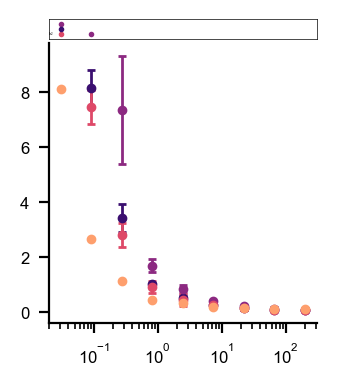

In [11]:
#try tsame as above but with a little box for things that never reach significance

fig, ax = plt.subplots(2,1, figsize=(4.4*cm, 5*cm), gridspec_kw={'height_ratios': [1, 14]}, dpi=200)
ocolormap = mpl.colormaps['magma']
colors = ocolormap(np.linspace(0.2,.8, 1024))
colormap = mpl.colors.ListedColormap(colors)
colors = colormap(np.linspace(0, 1, 4))

nkp.tts_plot(tts_dict, dpi=250, figsize=(4.4*cm,4.4*cm), include_fit=False, publish_ready=True, color_output=True, ax=ax[1], colormap=colormap)
#ax.set_yscale('log')

a = ax[1]
a.set_xscale('log')

a.yaxis.get_offset_text().set_fontsize(1)



b = ax[0]
b.set_xticks([])
b.set_yticks([])
lw = 0.25
b.spines['top'].set(linewidth=lw)
b.spines['bottom'].set(linewidth=lw)
b.spines['left'].set(linewidth=lw)
b.spines['right'].set(linewidth=lw)

if False:
    b.spines['top'].set_visible(False)
    b.spines['bottom'].set_visible(False)
    b.spines['left'].set_visible(False)
    b.spines['right'].set_visible(False)

b.set_xlim(*a.get_xlim())
b.set_xscale('log')
b.set_ylim(0,4)
b.set_xticks([])
# 1 then 2 then 1,2, the nslp 
ss=1
b.scatter(concs[1], 1,  c=colors[1], marker='o', s=ss)

b.scatter(concs[0], 3,  c=colors[1], marker='o', s=ss)
b.scatter(concs[0], 1,  c=colors[2], marker='o', s=ss)
b.scatter(concs[0], 2,  c=colors[0], marker='o', s=ss)

plt.subplots_adjust(hspace=0.025)

plt.savefig('./charts/fig4c_tts_plot_withNONTTS.png', dpi=2000, bbox_inches='tight')
plt.savefig('./charts/fig4c_tts_plot_withNONTTS.svg', dpi=2000, bbox_inches='tight')
plt.savefig('./charts/fig4c_tts_plot_withNONTTS.eps', dpi=2000, bbox_inches='tight')



